# A01753176 Gilberto André García Gaytán

## Subir csv en el ambiente local, si quieres probar el código abajo pon tu propia ruta, el csv esta adjunto en la entrega

In [1]:
import pandas as pd

In [2]:
# Intentando cargar el archivo CSV con una codificación diferente
df = pd.read_csv('D:\ia_1\stats\preprocessing\data\Twitch_game_data.csv', encoding='ISO-8859-1')

# Mostrando las primeras filas del dataset
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


- Rank: Ranking del juego.
- Game: Nombre del juego.
- Month: Mes.
- Year: Año.
- Hours_watched: Horas vistas.
- Hours_streamed: Horas transmitidas.
- Peak_viewers: Máximo de espectadores.
- Peak_channels: Máximo de canales.
- Streamers: Número de streamers.
- Avg_viewers: Espectadores promedio.
- Avg_channels: Canales promedio.
- Avg_viewer_ratio: Ratio promedio de espectadores.

# Clasificación de las variables:

## Variables categóricas:

- Game: Representa el nombre del juego. Es una variable nominal.
- Month: Representa el mes en el que se recopilaron los datos. Es una variable ordinal porque los meses tienen un orden específico.
- Year: Representa el año en el que se recopilaron los datos. Es una variable ordinal porque los años tienen un orden específico.

## Variables numéricas:

- Rank: Es una variable ordinal que representa el rango del juego en términos de popularidad.
## Varbiables de razón
- Hours_watched
- Hours_streamed 
-Peak_viewers 
- Peak_channels 
-Streamers
- Avg_viewers 
- Avg_channels
- Avg_viewer_ratio
#### Todas estas son variables de razón, ya que tienen un punto de partida definido (es decir, 0) y las diferencias entre los valores son significativas.

In [3]:
# Identificando registros duplicados
duplicate_rows = df[df.duplicated()]

duplicate_rows_count = len(duplicate_rows)
duplicate_rows_count

0

In [4]:
# Identificando valores faltantes
missing_values = df.isnull().sum()

missing_values

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

Hay un valor faltante en la columna Game. Esto indica que hay un registro en el conjunto de datos para el cual no se proporcionó el nombre del juego.

Boxplots para identificar posibles outliers en las variables numéricas del conjunto de datos.

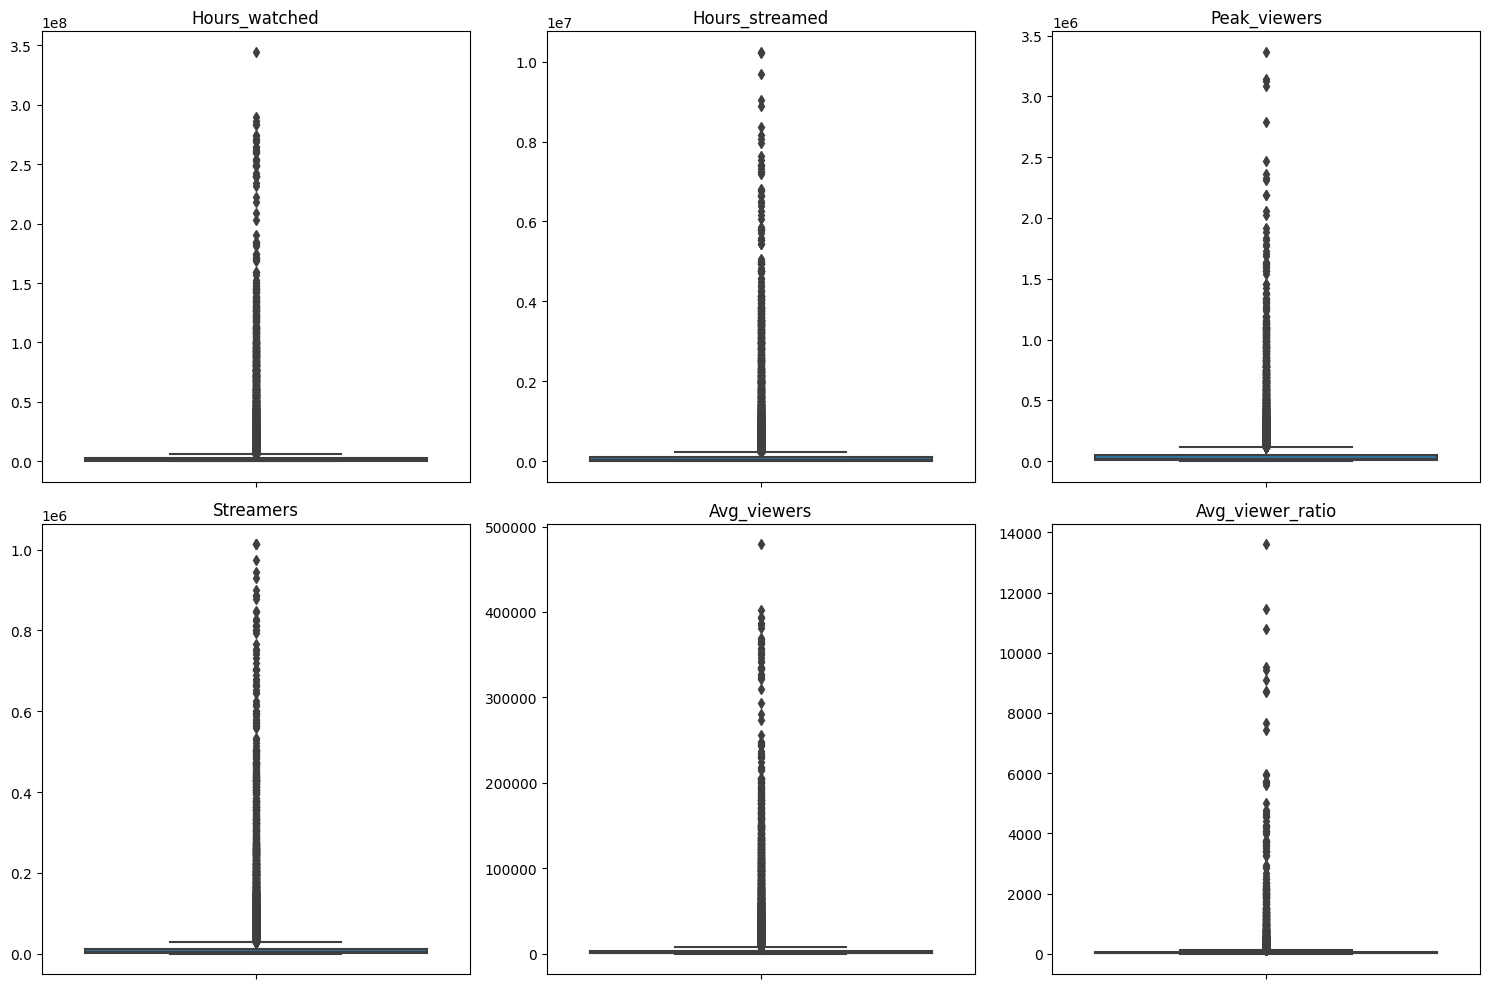

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas para visualizar
numeric_columns = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Streamers', 'Avg_viewers', 'Avg_viewer_ratio']

# Configuración de los gráficos
plt.figure(figsize=(15, 10))

# Creando boxplots para cada columna numérica
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Los boxplots proporcionan una visualización útil para identificar outliers. Observaciones:

Hours_watched, Hours_streamed, Peak_viewers, y Streamers: Estas columnas tienen muchos valores que se considerarían outliers, según la definición típica basada en el rango intercuartílico. Sin embargo, dado que estamos tratando con datos sobre la popularidad de juegos en Twitch, es posible que estos "outliers" realmente representen juegos extremadamente populares.
Avg_viewers: Esta columna también muestra algunos outliers, aunque menos que las columnas anteriores.
Avg_viewer_ratio: Los outliers aquí son menos pronunciados en comparación con las otras columnas.

-  Eliminar Valores Faltantes.

In [6]:
# Eliminando registros con valores faltantes
data_cleaned = df.dropna(subset=['Game'])

# Verificando que se haya eliminado el valor faltante
missing_values_cleaned = data_cleaned.isnull().sum()

missing_values_cleaned

Rank                0
Game                0
Month               0
Year                0
Hours_watched       0
Hours_streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

El valor faltante en la columna Game ha sido eliminado correctamente.

Se hará una transformación logarítmica, la cual solo se puede aplicar a valores positivos, primero se verifica si hay algún valor igual a 0 en las columnas numéricas que se quieren transformar. Si es así, se agrega una pequeña constante antes de aplicar la transformación.

In [7]:
# Columnas a transformar
transform_columns = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Streamers', 'Avg_viewers', 'Avg_viewer_ratio']

# Verificando si hay algún valor igual a 0 en las columnas seleccionadas
zero_values_check = (data_cleaned[transform_columns] == 0).sum()

zero_values_check

Hours_watched        0
Hours_streamed       0
Peak_viewers         0
Streamers           13
Avg_viewers          0
Avg_viewer_ratio     0
dtype: int64

La columna Streamers tiene 13 valores que son 0. Para aplicar la transformación logarítmica, se necesita que todos los valores sean positivos. La solución es es sumar una pequeña constante a toda la columna antes de aplicar la transformación logarítmica.

In [8]:
import numpy as np

# Añadiendo una constante a la columna 'Streamers'
data_cleaned['Streamers'] = data_cleaned['Streamers'] + 1

# Aplicando la transformación logarítmica a las columnas seleccionadas
data_log_transformed = data_cleaned.copy()
for column in transform_columns:
    data_log_transformed[column] = np.log(data_log_transformed[column])

data_log_transformed[transform_columns].head()

C:\Users\gggan\AppData\Local\Temp\ipykernel_1428\3296271553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Streamers'] = data_cleaned['Streamers'] + 1


,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_viewer_ratio
0,18.362810,14.124497,13.181142,11.768908,11.752108,4.238301
1,17.683223,13.629307,12.828406,11.702305,11.072527,4.053870
2,17.626295,12.979409,12.660591,10.693648,11.015592,4.646888
3,17.502793,12.371176,11.785674,10.496013,10.892080,5.131613
4,16.597620,13.956644,11.179395,12.273988,9.986909,2.641198


Técnica de Escalado o Normalización para estandarizar las columnas numéricas para que tengan una media de 0 y una desviación estándar de 1.

In [9]:
from sklearn.preprocessing import StandardScaler

# Inicializando el escalador
scaler = StandardScaler()

# Estandarizando las columnas numéricas transformadas
data_log_transformed[transform_columns] = scaler.fit_transform(data_log_transformed[transform_columns])

# Mostrando las primeras filas de las columnas transformadas y estandarizadas
data_log_transformed[transform_columns].head()

,Hours_watched,Hours_streamed,Peak_viewers,Streamers,Avg_viewers,Avg_viewer_ratio
0,2.984073,2.092912,2.378199,1.928796,2.970661,0.735855
1,2.516670,1.804184,2.110054,1.889870,2.503368,0.554713
2,2.477516,1.425252,1.982484,1.300369,2.464218,1.137156
3,2.392574,1.070612,1.317385,1.184863,2.379289,1.613237
4,1.770018,1.995043,0.856500,2.223985,1.756876,-0.832766


Con estos pasos se hizo lo siguiente:
- Eliminamos registros con valores faltantes.
- Aplicamos una transformación logarítmica a ciertas columnas numéricas.
- Estandarizamos las columnas numéricas transformadas.

Se identifican los valores atípicos en cada columna utilizando el método del rango intercuartil (IQR).
El método IQR se basa en la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores que caen fuera del rango [Q1−1.5×IQR,Q3+1.5×IQR] se consideran atípicos.

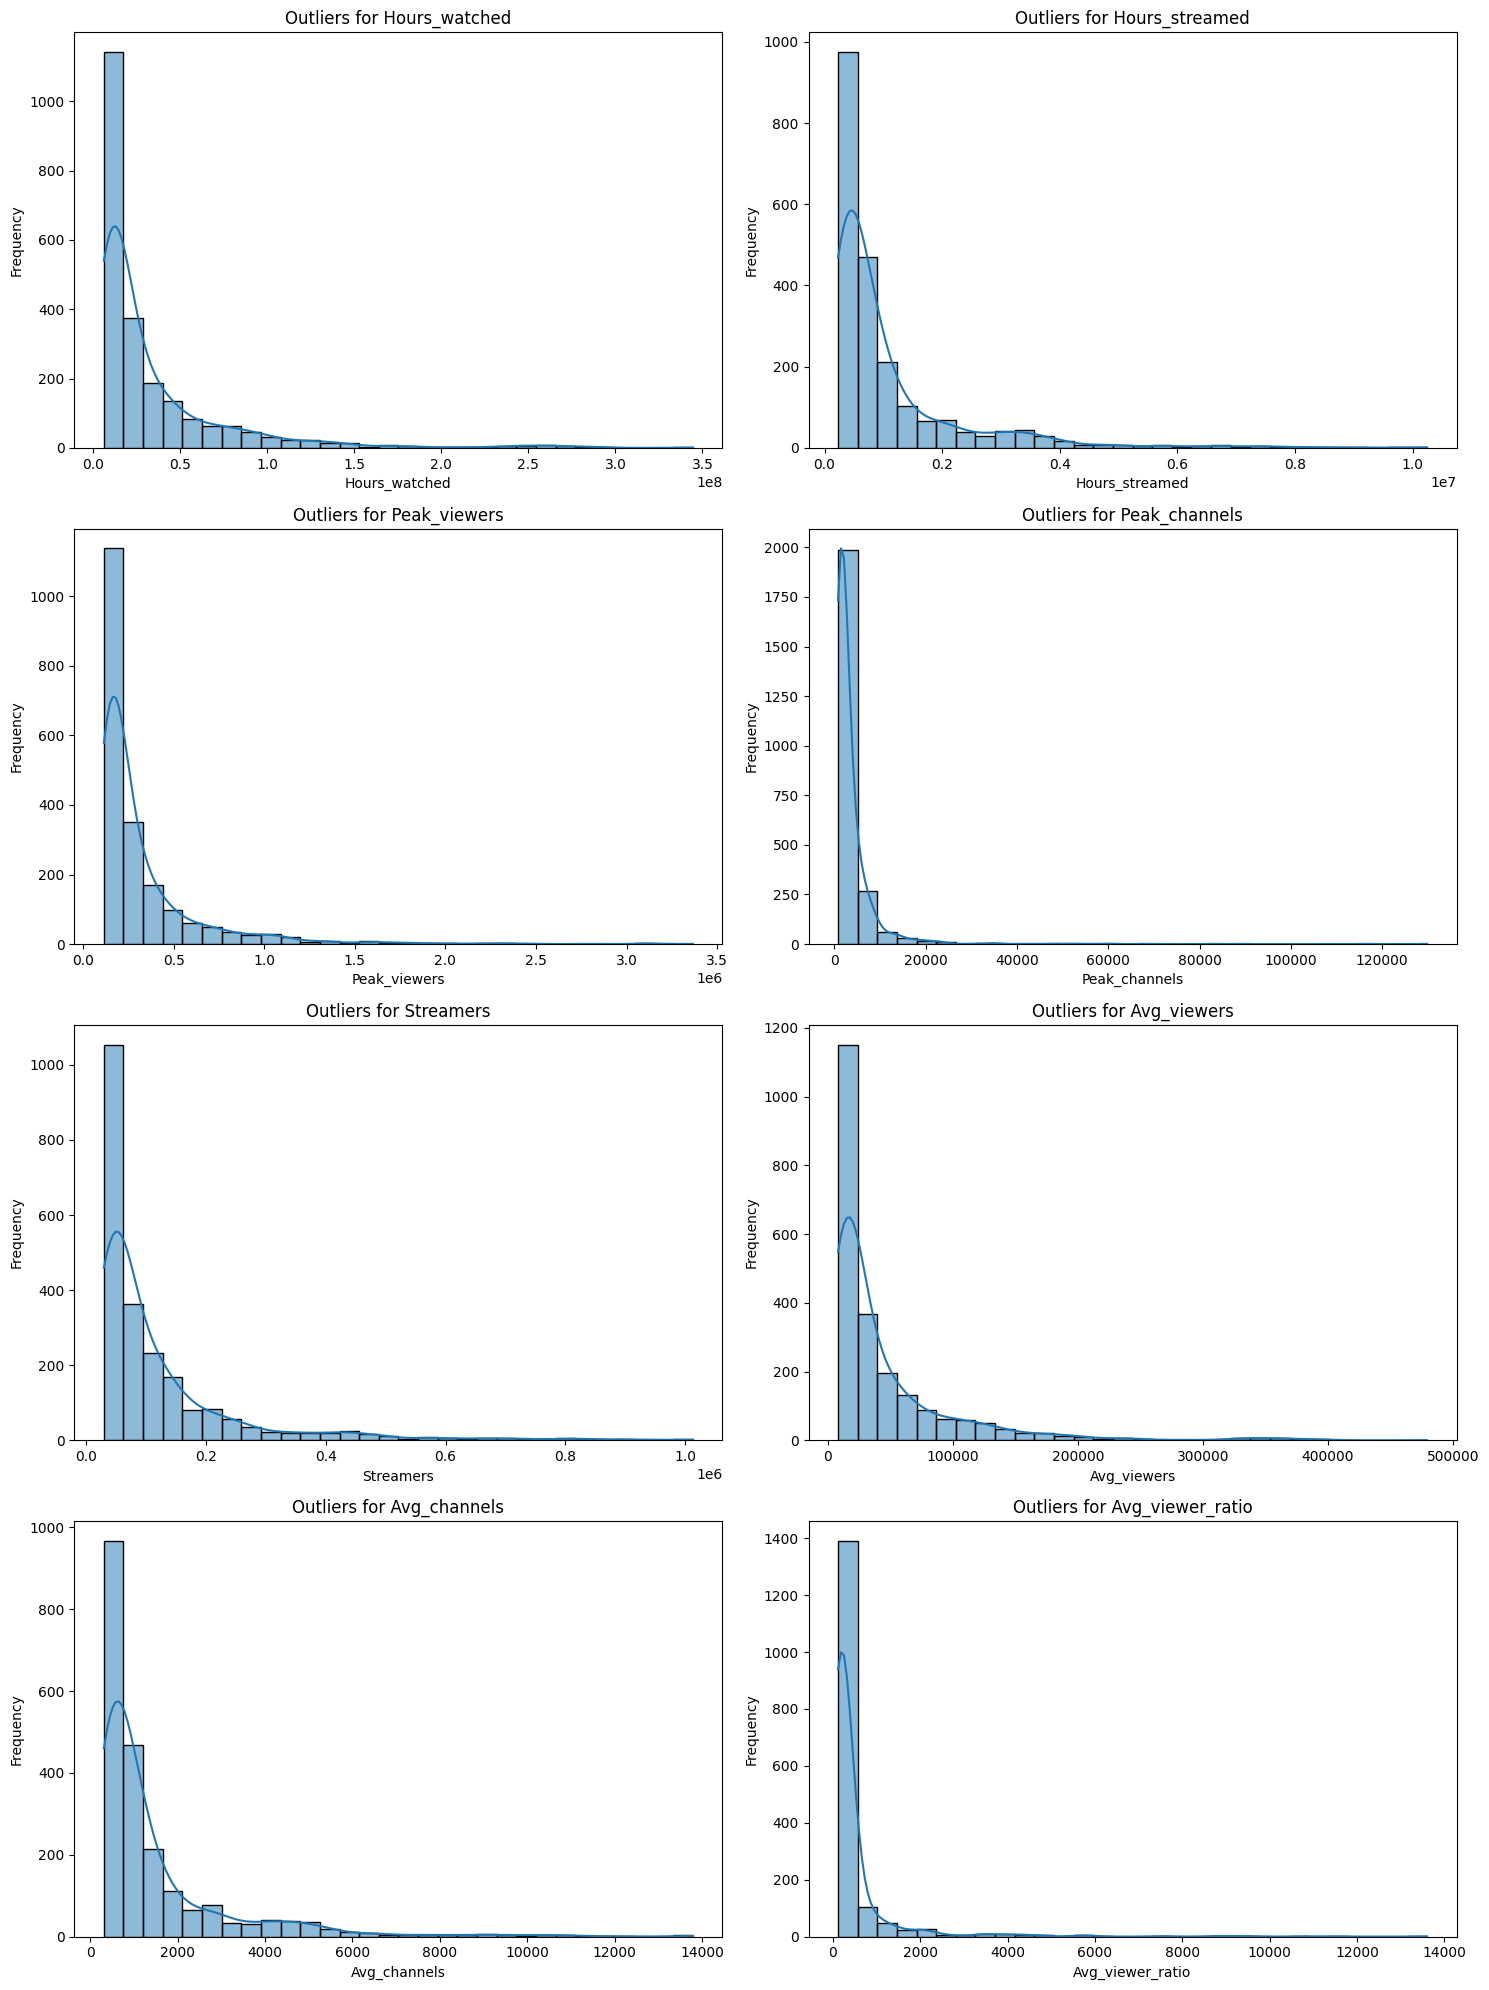

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas (excluyendo 'Rank', 'Month' y 'Year' que son identificativos)
numeric_columns = ['Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 
                'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio']

# Función para detectar outliers utilizando IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df[outliers]

# Visualizar los datos atípicos para cada columna numérica
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(detect_outliers(column)[column], bins=30, kde=True)
    plt.title(f'Outliers for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


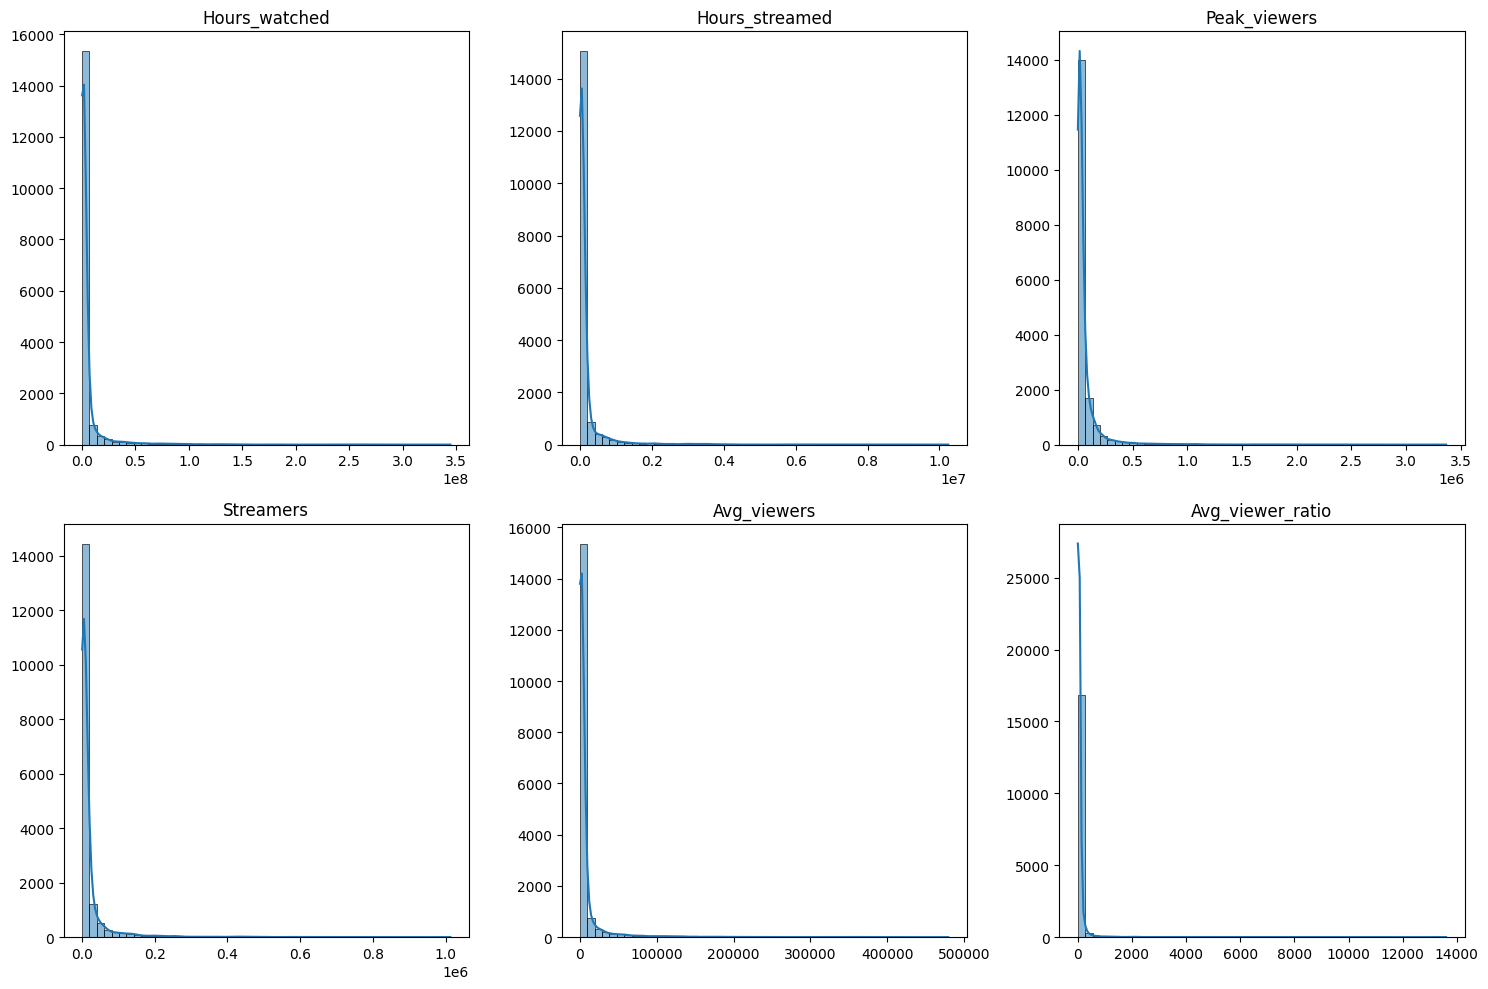

In [12]:
# Histogramas para las columnas seleccionadas
plt.figure(figsize=(15,10))
# Lista de columnas para visualizar
cols_to_plot = ["Hours_watched", "Hours_streamed", "Peak_viewers", "Streamers", "Avg_viewers", "Avg_viewer_ratio"]

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


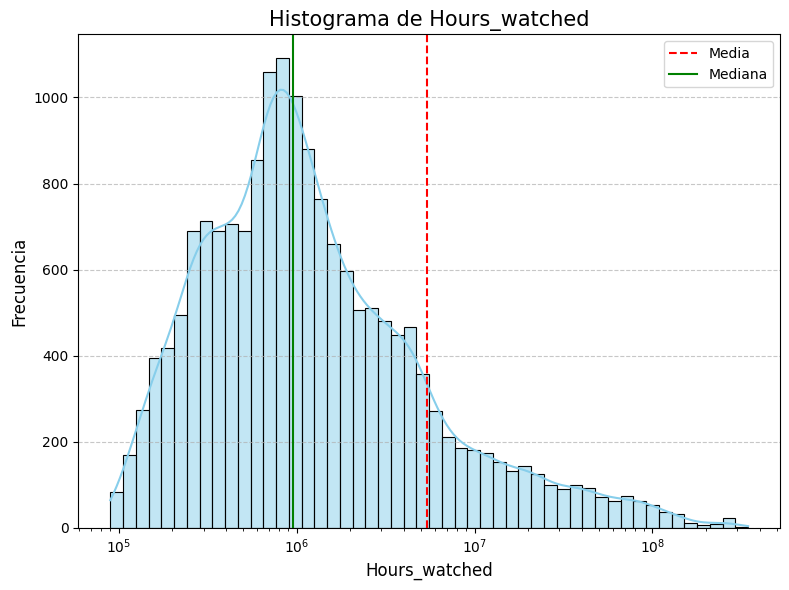

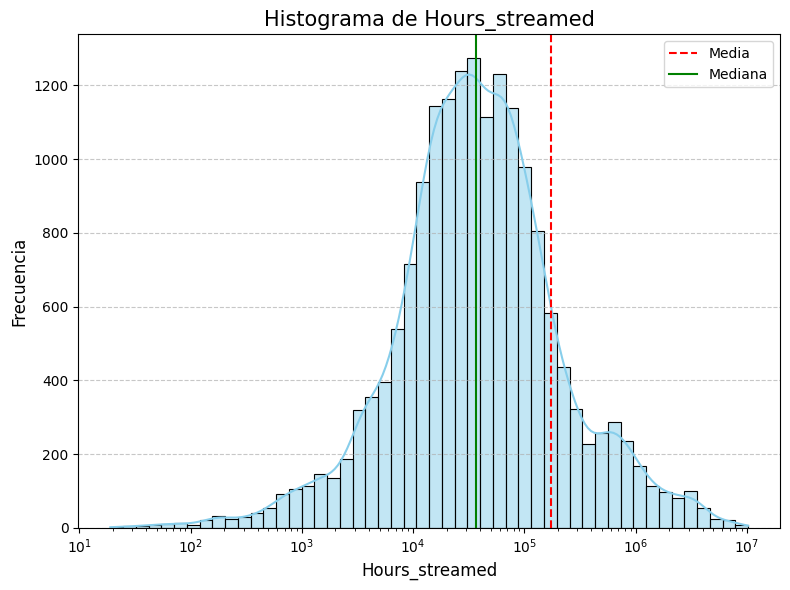

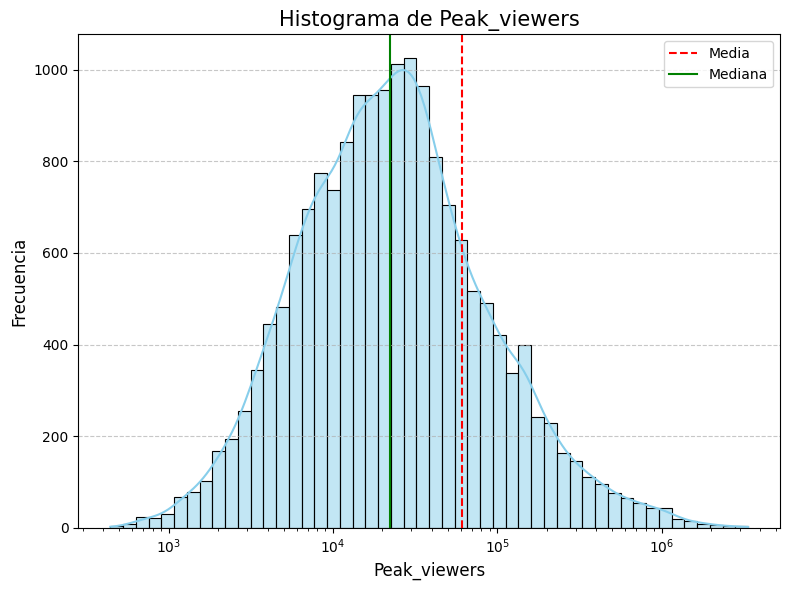

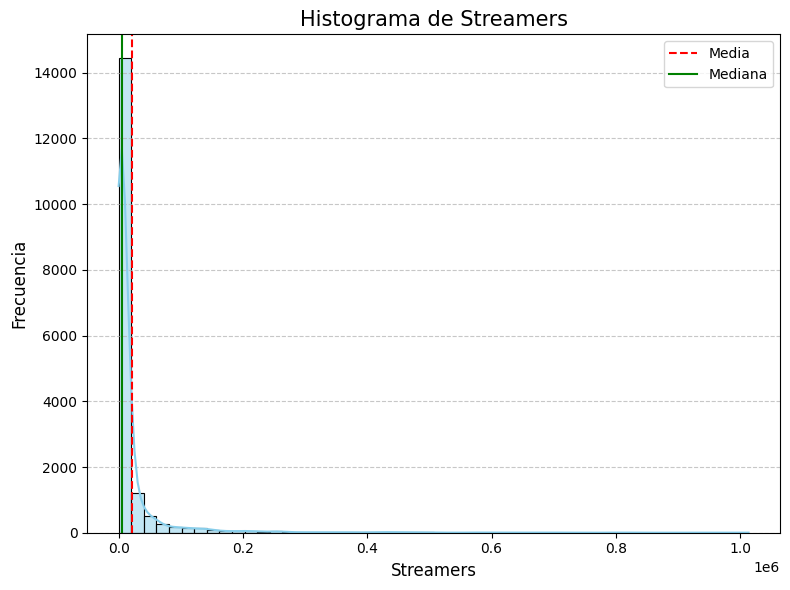

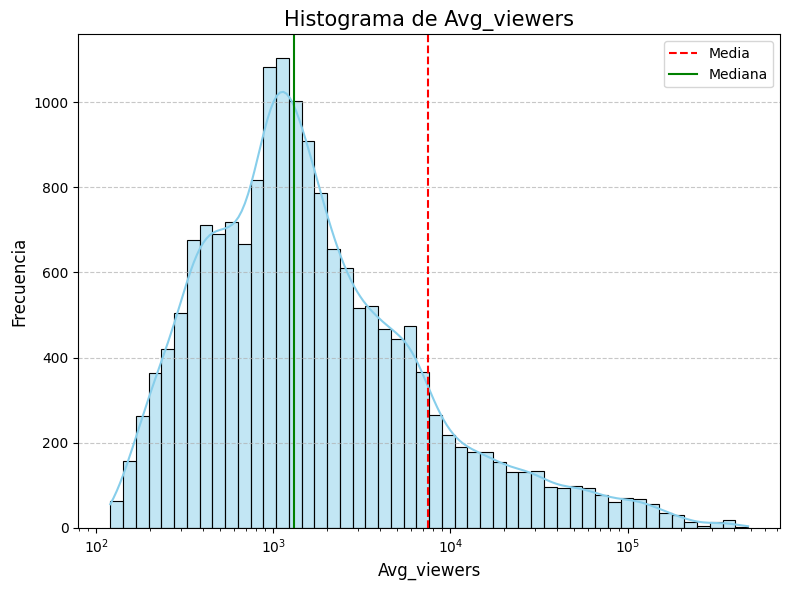

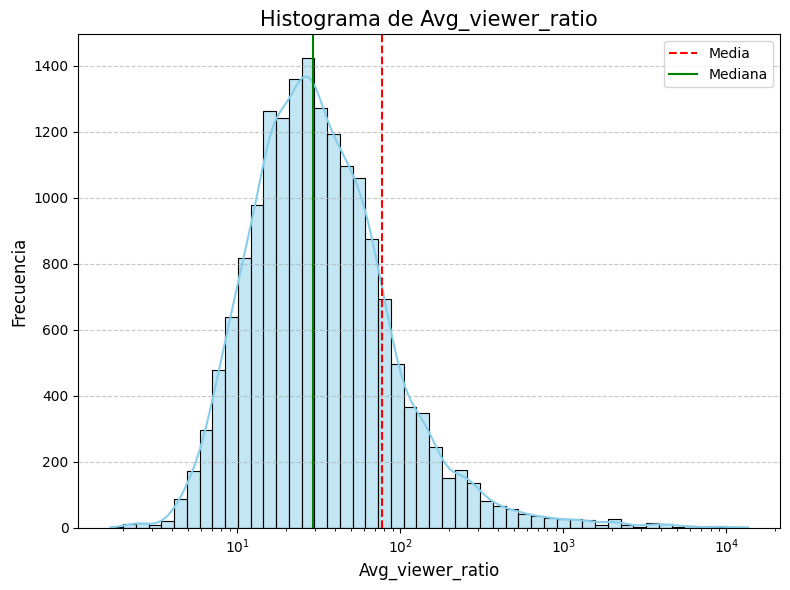

In [13]:
def histogram(data, column):
    plt.figure(figsize=(8, 6))
    
    # Aplicando escala logarítmica si es necesario
    if data[column].min() > 0:
        sns.histplot(data=data, x=column, kde=True, bins=50, color='skyblue', log_scale=True)
    else:
        sns.histplot(data=data, x=column, kde=True, bins=50, color='skyblue')
    
    # Añadiendo línea vertical para la media y mediana
    plt.axvline(data[column].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(data[column].median(), color='green', linestyle='-', label='Mediana')
    
    plt.title(f'Histograma de {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Creando histogramas mejorados para las columnas seleccionadas
for col in cols_to_plot:
    histogram(df, col)

- Se agrego una escala logarítmica para las columnas donde es aplicable, lo que ayuda para poder analizar la distribución de los datos que varían en varios órdenes de magnitud.
- Las líneas verticales representan la media (en rojo) y la mediana (en verde) para cada columna, lo que ayuda bastante a tener una idea rápida de la ubicación central de los datos.